In [2]:
# Today we will look at hands on feature generation,
# regularization, model development, and validation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

import os
imgdir = 'output_images'
if not os.path.isdir(imgdir):
    os.mkdir(imgdir)

In [4]:
xlbl = 'bananas bought'
ylbl = 'bananas sold'
NUM_DATA = 10

In [5]:

def get_y(x):
    y = x + np.random.randint(-3, 3, size=(len(x), 1)) - x **2 / 150 - (x > 40) * 10 - (x < 30) * 10
    return y

In [6]:
np.random.seed(0)
x = np.random.randint(20, 50, size=(NUM_DATA, 1))
y = get_y(x)

In [7]:
np.corrcoef(x.flatten(), y.flatten())

array([[1.        , 0.81790002],
       [0.81790002, 1.        ]])

In [12]:
def plot_data():
    # Write a function that plots the data. 
    # Include axis labels and a title
    plt.rcParams.update({'font.size': 15})
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='real sales')
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title('store banana sales vs received')

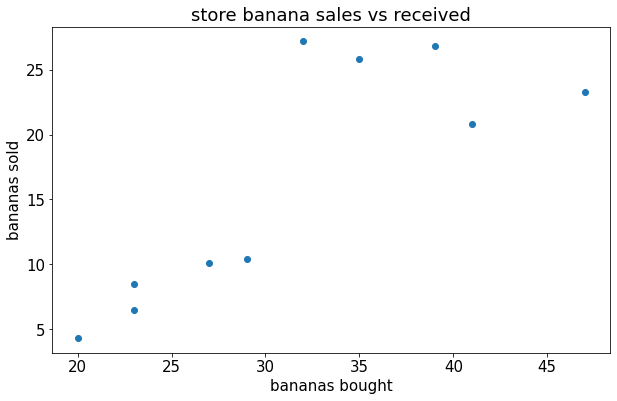

In [13]:
plot_data()
plt.savefig(os.path.join(imgdir, 'raw_data.jpg'))

In [17]:

lr = # TODO: Train a Ridge model from the x, y data

lr.coef_, lr.intercept_

SyntaxError: invalid syntax (<ipython-input-17-f064dcfd01a0>, line 1)

In [18]:
vizx = # TODO: Create a much more granular dataset of the values of x from below the minimum value
# to above the maximum value. This will be used to visualize what the model is learning

lry = lr.predict(vizx)

SyntaxError: invalid syntax (<ipython-input-18-d5dee9b5fc17>, line 1)

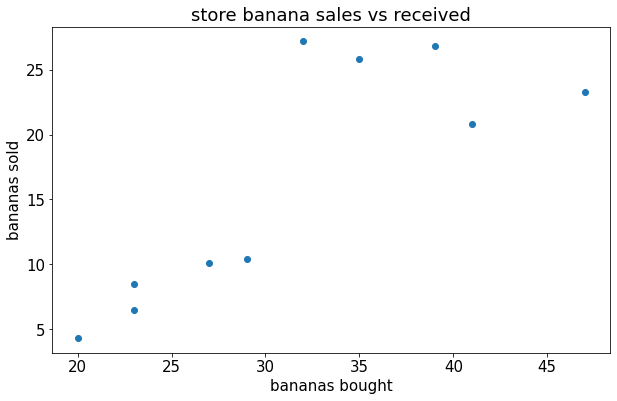

In [19]:
plot_data()
# TODO: plot the new visualization data in red. Give it a label, and add a legend to the plot


In [21]:
feat8 = # TODO: Create a polynomial feature expansion of the real dataset.
# Normalize each of the features by making them have mean 0 and standard deviation 1

vizx8 = # TODO: Apply the same transformation to vizx. Calculating the polynomial
# features and normalizing them

lr8 = # TODO train a model with these new features. use Ridge(0) to not apply regularization
lr8y = lr8.predict(vizx8)

NameError: name 'vizx' is not defined

In [14]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
      (lr8.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(lr8.intercept_[0].round())

'The model learned y = x^1 * -178410560.69 + x^2 * 40995572492.44 + x^3 * -4980321973942.21 + x^4 * 366554508424328.2 + x^5 * -1.7329856515010806e+16 + x^6 * 5.1832020263029146e+17 + x^7 * -8.966280783536896e+18 + x^8 * 6.851100949731862e+19 + 16.0'

In [15]:
lr8.coef_, lr8.intercept_

(array([[ 0.00000000e+00, -5.64590382e+06,  3.83566359e+07,
         -1.29658068e+08,  2.52335257e+08, -3.02739577e+08,
          2.22432241e+08, -9.21407190e+07,  1.65228085e+07]]),
 array([16.37466669]))

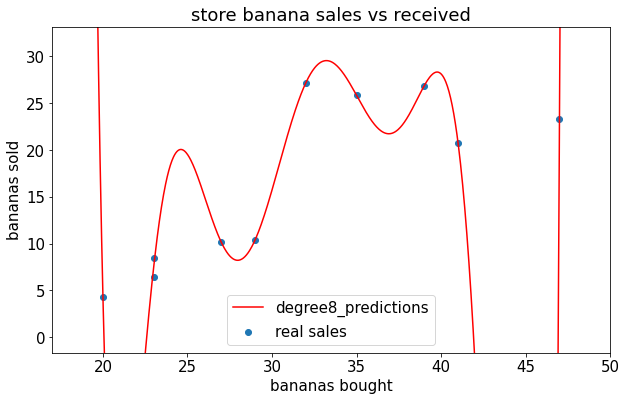

In [16]:
buffer = 3
plot_data()
# TODO: Plot vixz and lr8y.
# add buffer to the left and right of the graph to make it easier to view.
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'degree8_predictions.jpg'))

In [17]:
lr8.coef_

array([[ 0.00000000e+00, -5.64590382e+06,  3.83566359e+07,
        -1.29658068e+08,  2.52335257e+08, -3.02739577e+08,
         2.22432241e+08, -9.21407190e+07,  1.65228085e+07]])

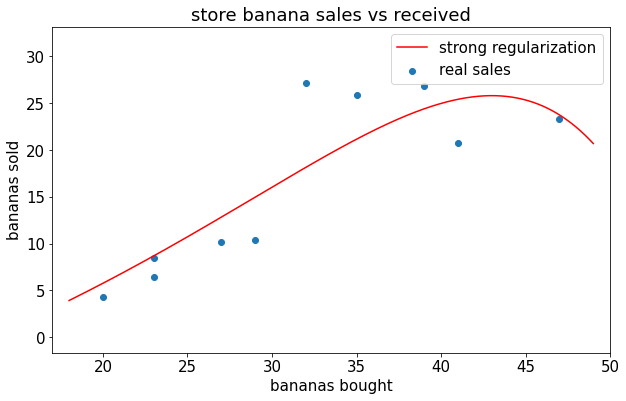

In [18]:

regs = # Train a new model with Ridge(10) to have a regularization coefficient of 10.
ystrong = regs.predict(vizx8)

plot_data()
plt.plot(vizx, ystrong, c='red', label='strong regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'strongreg_predictions.jpg'))

In [19]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (regs.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(regs.intercept_[0].round())

'The model learned y = x^1 * 163.6 + x^2 * 4370.87 + x^3 * 92734.74 + x^4 * 1307224.97 + x^5 * -20471554.03 + x^6 * -3102777029.02 + x^7 * -198392839690.01 + x^8 * -10444493671057.14 + 16.0'

In [ ]:
## TODO: Thought process. 
# Were the parameters the model learned larger or smaller than without regularization? 
# By what factor?

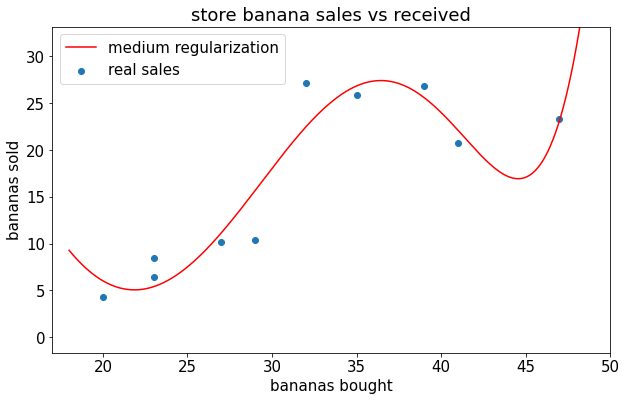

In [20]:

regm = # Train a new model with regularization 1e-5
ymed = regm.predict(vizx8)

plot_data()
plt.plot(vizx, ymed, c='red', label='medium regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'medium_reg_predictions.jpg'))

In [21]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (regm.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(regm.intercept_[0].round())

'The model learned y = x^1 * -1566.15 + x^2 * -93967.23 + x^3 * 8166658.02 + x^4 * 315272903.31 + x^5 * -3906750382.64 + x^6 * -782741024619.71 + x^7 * -25155033248094.24 + x^8 * 1540247134805556.2 + 16.0'

C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29368e-22): result may not be accurate.
  overwrite_a=True).T


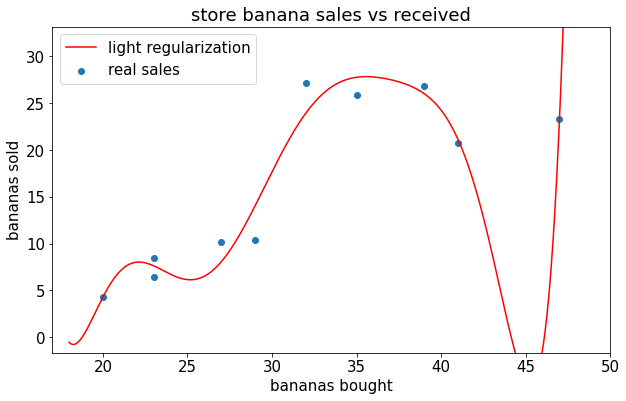

In [22]:

regl = # Train a new model with regularization 1e-20
ylight = regl.predict(vizx8)

plot_data()
plt.plot(vizx, ylight, c='red', label='light regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'lightreg_predictions.jpg'))

In [23]:
'The model learned y = ' + ' + '.join([str(t[0]) + ' * ' + str(t[1].round(2)) 
            for t in list(zip(['x^' + str(idx) for idx in range(1, 9)], 
                              (regl.coef_[:,1:] * mean[1:]).flatten()))]) + ' + ' + str(regl.intercept_[0].round())

'The model learned y = x^1 * -9930052.1 + x^2 * 2424895298.24 + x^3 * -311179602753.76 + x^4 * 24055319705101.47 + x^5 * -1188261051542857.8 + x^6 * 3.696020604133602e+16 + x^7 * -6.622287590847223e+17 + x^8 * 5.222869956435355e+18 + 16.0'

In [24]:
def plot_data(figsize=(10,4)):
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=figsize)
    plt.scatter(x, y, label='real sales')
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title('store banana sales vs received')

In [ ]:
# Now lets look at all of our curves at the same time. Which one do we think looks most accurate?

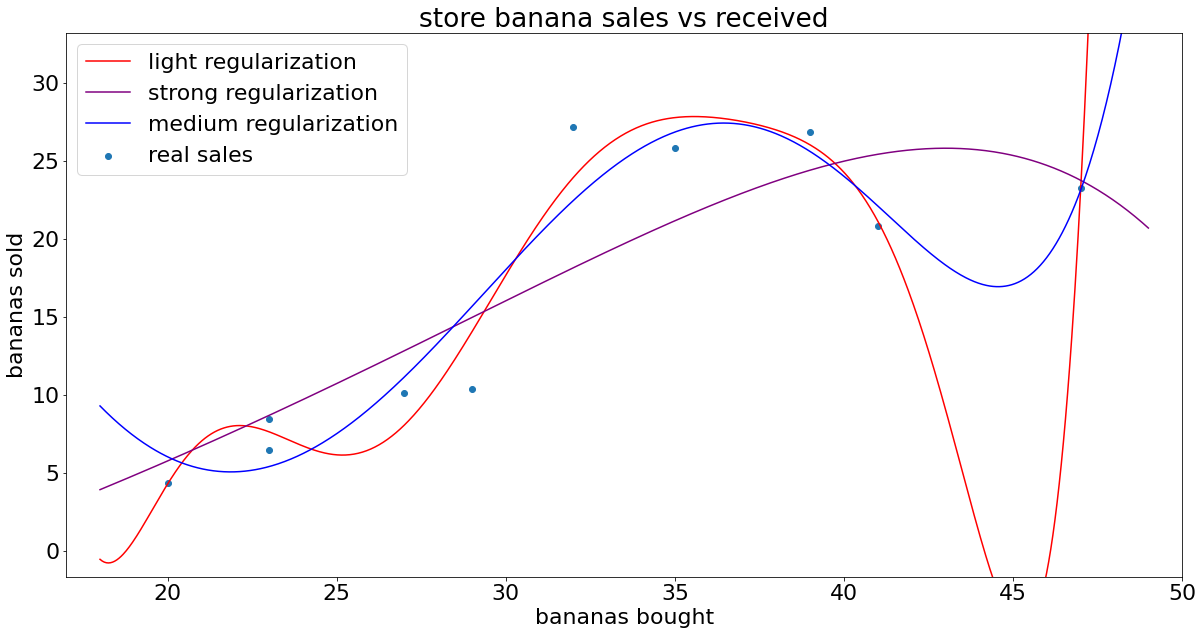

In [25]:

plot_data(figsize=(20,10))
plt.plot(vizx, ylight, c='red', label='light regularization')
plt.plot(vizx, ystrong, c='purple', label='strong regularization')
plt.plot(vizx, ymed, c='blue', label='medium regularization')
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()
plt.savefig(os.path.join(imgdir, 'allreg.jpg'))

In [24]:
# TODO. So we visualized some of our models to get intuition for what regularization is doing.
# But what about quantitatively measure the differences.
# Which models hit the datapoints best above?
# Which models do you think with validate the best?
# lets validate.

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
np.random.seed(0)
NUM_DATA_VALIDATE = 20
x = np.random.randint(20, 50, size=(NUM_DATA_VALIDATE, 1))
y = get_y(x)
x_train, x_test, y_train, y_test = # Split dataset into train and test with a 50%50 split

In [28]:
x_train_features, x_test_features = # TODO: Extract polynomial features with PolynomialFeatures(8)

In [29]:
errors = {}
for reg in [100, 1., 1e-5, 1e-20]:
    
    mdl = ## TODO: Train a model with regularizatio reg
    yhat = # make predictions on x_test_features
    error = # Calculate your error
    errors[reg] = error

C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.25399e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.03671e-27): result may not be accurate.
  overwrite_a=True).T
C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.05453e-32): result may not be accurate.
  overwrite_a=True).T
C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.25399e-47): result may not be accurate.
  overwrite_a=True).T


In [30]:
# Which regularization strength performed the best?
pd.Series(errors).to_frame()

,0
1.000000e+02,24.347070
1.000000e+00,17.072801
1.000000e-05,19.839433
1.000000e-20,30.735365


C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.25399e-25): result may not be accurate.
  overwrite_a=True).T
C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.03671e-27): result may not be accurate.
  overwrite_a=True).T
C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.05453e-32): result may not be accurate.
  overwrite_a=True).T
C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.25399e-47): result may not be accurate.
  overwrite_a=True).T


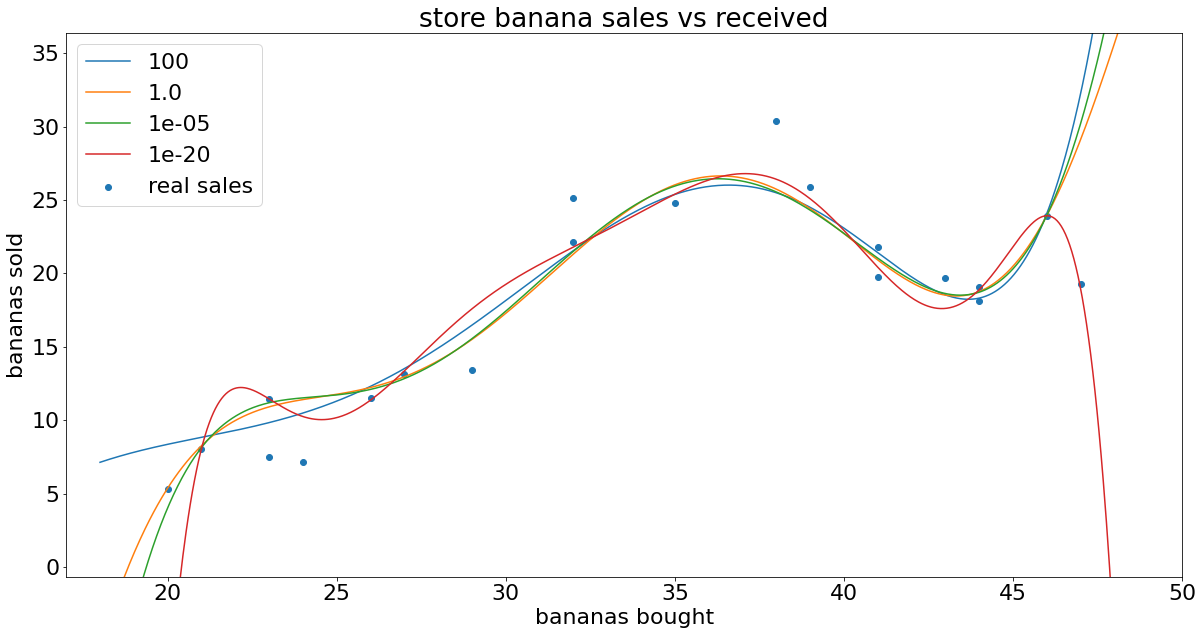

In [31]:
errors = {}
plot_data(figsize=(20,10))

lry = lr.predict(vizx)
for reg in [100, 1., 1e-5, 1e-20]:
    mdl = # Train a model
    yhat = # make predictions
    error = # Calculate the error
    errors[reg] = error
    yhatvix = # make predictions from the granular dataset for visualization
    plt.plot(vizx, yhatvix, label=reg)
plt.xlim(x.min() - buffer, x.max() + buffer)
plt.ylim(y.min() - buffer * 2, y.max() + buffer * 2)
plt.legend()